In [1]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import pickle
from joblib import dump, load
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import os

In [2]:
#df without others gens

df = pd.read_csv(r'C:\Users\teka_\DATA SCIENCE\Concordia-Bootcamps\FINAL PROJECT\Final\df_wo_othersGens.csv')
df

,snpID,class,chromosome,position,most_severe_consequence,GeneID,sourceId,protein_class_name,protein_class,Disease Class,Category,Gene/Protein Symbol
0,rs1000256867,snv,17,7673550,missense variant,7157,VEP,Transcription factor,DTO_05007542,cervical intraepithelial neoplasia; papillomav...,cancer,TP53
1,rs1000256867,snv,17,7673550,missense variant,7157,VEP,Transcription factor,DTO_05007542,"carcinoma, squamous cell; esophageal neoplasms...",cancer,TP53
2,rs1000256867,snv,17,7673550,missense variant,7157,VEP,Transcription factor,DTO_05007542,duodenal ulcer; helicobacter infections; stoma...,cancer,TP53
3,rs1000256867,snv,17,7673550,missense variant,7157,VEP,Transcription factor,DTO_05007542,oral lichen planus,infection,TP53
4,rs1000256867,snv,17,7673550,missense variant,7157,VEP,Transcription factor,DTO_05007542,kaposi's sarcoma,cancer,TP53
...,...,...,...,...,...,...,...,...,...,...,...,...
535090,rs967624732,snv,17,43097269,missense variant,672,VEP,Enzyme,DTO_05007624,"breast neoplasms; cell transformation, neoplas...",cancer,BRCA1
535091,rs967624732,snv,17,43097269,missense variant,672,VEP,Enzyme,DTO_05007624,"breast cancer, male",cancer,BRCA1
535092,rs967624732,snv,17,43097269,missense variant,672,VEP,Enzyme,DTO_05007624,breast neoplasms; mammary neoplasms; neoplasms...,cancer,BRCA1
535093,rs967624732,snv,17,43097269,missense variant,672,VEP,Enzyme,DTO_05007624,ovarian diseases,reproduction,BRCA1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535095 entries, 0 to 535094
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   snpID                    535095 non-null  object
 1   class                    535095 non-null  object
 2   chromosome               535095 non-null  int64 
 3   position                 535095 non-null  int64 
 4   most_severe_consequence  535095 non-null  object
 5   GeneID                   535095 non-null  int64 
 6   sourceId                 535095 non-null  object
 7   protein_class_name       535095 non-null  object
 8   protein_class            535095 non-null  object
 9   Disease Class            535095 non-null  object
 10  Category                 535095 non-null  object
 11  Gene/Protein Symbol      535095 non-null  object
dtypes: int64(3), object(9)
memory usage: 49.0+ MB


In [4]:
# Calculating and displaying the number of missing values per column in a DataFrame


nan_per_column = df.isna().sum()
nan_per_column

snpID                      0
class                      0
chromosome                 0
position                   0
most_severe_consequence    0
GeneID                     0
sourceId                   0
protein_class_name         0
protein_class              0
Disease Class              0
Category                   0
Gene/Protein Symbol        0
dtype: int64

In [5]:
# Counting the occurrences of each unique value in the 'class' column

df['class'].value_counts()

class
snv       231483
delins    198300
del        77100
ins        24520
mnv         3692
Name: count, dtype: int64

In [6]:
# Counting the occurrences of each unique value in the 'chromosome' column

df['chromosome'].value_counts()

chromosome
17    457743
13     42924
11     25298
10      3840
22      3132
3       2158
Name: count, dtype: int64

In [7]:
# Counting the occurrences of each unique value in the 'position' column

df['position'].value_counts()

position
7674249     1352
7673749     1014
7675146     1014
7670685     1014
7676043      676
            ... 
87933114      10
87952264      10
87863959      10
87864168      10
87897393      10
Name: count, Length: 6854, dtype: int64

In [8]:
# Counting the occurrences of each unique value in the 'most_severe_consequence' column


df['most_severe_consequence'].value_counts()

most_severe_consequence
frameshift variant                    272460
missense variant                      114596
stop gained                            86297
splice donor variant                   17032
splice acceptor variant                16738
intron variant                          7713
splice region variant                   6270
inframe deletion                        3820
synonymous variant                      3015
5 prime UTR variant                     1966
3 prime UTR variant                     1650
start lost                               964
non coding transcript exon variant       700
coding sequence variant                  608
stop lost                                456
protein altering variant                 446
inframe insertion                        364
Name: count, dtype: int64

In [9]:
# Counting the occurrences of each unique value in the 'Disease Class' column

df['Disease Class'].value_counts()

Disease Class
cell transformation, neoplastic; gastrointestinal neoplasms    6132
breast cancer risk and prenatal viability                      6132
prenatal viability                                             6132
spontaneous chromosomal instability                            6132
stomach cancer; ovarian cancer                                 6132
                                                               ... 
breast neoplasms; carcinoma; mammary neoplasms                  166
neoplasm invasiveness; uterine cervical neoplasms               166
ductal carcinoma of the breast                                  166
esophageal cancer; barrett's esophagus                          166
colorectal cancer; stomach cancer                               166
Name: count, Length: 267, dtype: int64

In [10]:
# Counting the occurrences of each unique value in the 'Category' column


df['Category'].value_counts()

Category
cancer             456624
other               27492
unknown             13428
cardiovascular       7816
infection            6282
immune               5235
normalvariation      5200
reproduction         5200
metabolic            2094
neurological         2094
developmental        1815
psych                1047
chemdependency        768
Name: count, dtype: int64

In [11]:
# Counting the occurrences of each unique value for the 7 genes chosen in the 'Gene/Protein Symbol' column


df['Gene/Protein Symbol'].value_counts()

Gene/Protein Symbol
BRCA1     280800
TP53      176943
BRCA2      42924
ATM        25298
PTEN        3840
CHEK2       3132
PIK3CA      2158
Name: count, dtype: int64

### SELECTION OF COLUMNS BASED ON THE TECHNICAL KNOWLEDGE OF EACH ONE, AND AVOIDING HIGH CORRELATION

#### Categorical Columns:

Class: Contains types of genetic variants such as SNV (single nucleotide variants), delins (deletions and insertions), del (deletions), ins (insertions), and MNV (multi-nucleotide variants). This column is crucial to understanding the type of mutation present and how different types may be associated with different risks or characteristics of breast cancer.

Most Serious Consequence: Includes the potential impact of the variant on the protein product, such as frameshift variants, missense variants, loss of function (stop gained), and others. Analyzing this column helps predict the severity and possible functional impact of genetic variants.

Disease Class: Categorizes the types of diseases or conditions associated with specific genetic variants. 

Category: Distinguishes between different categories of diseases or conditions (such as cancer, cardiovascular, infectious, immunological, among others). This classification helps to contextualize the genetic variant within different health conditions, which is essential for targeted investigations and development of specific treatments.

#### Numeric Columns:

Chromosome: Indicates the chromosome on which the variant was identified, which is essential for genomic localization and genetic linkage studies.

Position: Refers to the specific position on the chromosome where the variant occurs. This is useful for mapping exactly where mutations occur and how they may be clustered or distributed throughout the genome.

# LOGISTIC REGRESSION

#### Columns: Class, Chromosome, Position, Most Serious Consequence, Disease Class, Category

In [12]:
# # Applying One-Hot Encoding to categorical variables
# df_encoded = pd.get_dummies(df, columns=['class', 'most_severe_consequence','Disease Class', 'Category'], drop_first=True)


# # Instantiating the label encoder
# label_encoder = LabelEncoder()

# # Fitting the encoder to the Gene/Protein Symbol column and transforming it
# df_encoded['Gene/Protein Symbol'] = label_encoder.fit_transform(df_encoded['Gene/Protein Symbol'])

# # Saving the class mapping
# label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
# for encoded, original in label_mapping.items():
#     print(f"Class {original}: {encoded}")

# # Setting X and y, including categorical and numerical columns
# X = df_encoded[['chromosome', 'position'] + [col for col in df_encoded.columns if col.startswith(('class_','most_severe_consequence_', 'Disease Class_', 'Category_'))]]
# y = df_encoded['Gene/Protein Symbol']

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Splitting the data into training and testing sets
# numerical_features = ['chromosome', 'position']
# categorical_features = [col for col in X.columns if col not in numerical_features]

# # Normalizing the numerical data
# scaler = StandardScaler()
# X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
# X_test_num_scaled = scaler.transform(X_test[numerical_features])

# # Creating DataFrames of the scaled data
# X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features, index=X_train.index)
# X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features, index=X_test.index)

# # Recombining scaled numerical columns with categorical columns
# X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_features]], axis=1)
# X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_features]], axis=1)

# # Building and training the model
# model = LogisticRegression(solver='liblinear', max_iter=1000)
# model.fit(X_train_final, y_train)

# # Saving the trained model
# dump(model, 'logistic_regression_model.joblib')

# # Making predictions and evaluations
# predictions = model.predict(X_test_final)
# probabilities = model.predict_proba(X_test_final)

# # Generating and displaying the classification report
# print("Accuracy of logistic regression classifier on test set: {:.2f}".format(model.score(X_test_final, y_test)))
# print(classification_report(y_test, predictions))

# # Generating and displaying the confusion matrix
# cm = confusion_matrix(y_test, predictions)

# # Visualizing the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

###### The classification report shows perfect scores across all metrics (precision, recall, and F1-score) for each gene, with an overall accuracy of 1.0 or 100%. However, these values indicates overfitting. 
###### In order to correct the overfitting the column "Disease Class" was removed due to its high correlation with the outcome, and contained information that wouldn't be used in a real-world scenario.



Below the image from the code above. 
To access these metrics and confusion matrix, uncommenting the code above.

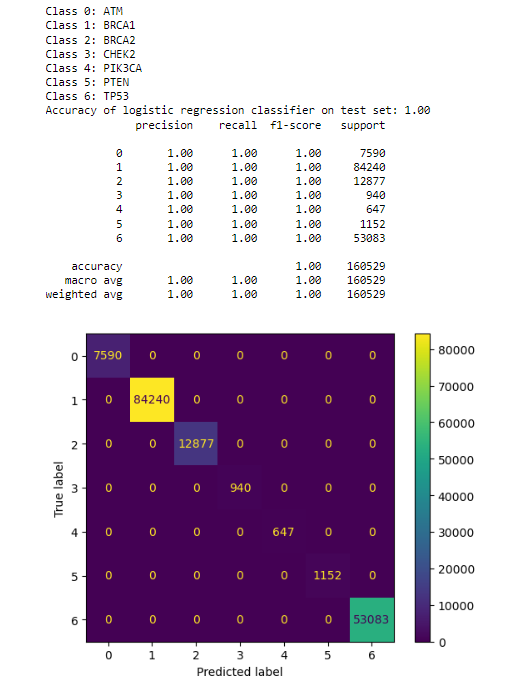

#### Columns: Class, Chromosome, Position, Most Serious Consequence, Category

In [13]:
#prep-processing function


def preprocess_data(df, frac=1):
    # Step 1: Stratified Sampling
    def stratified_sample(df, frac):
        df_sample = df.groupby('Gene/Protein Symbol', group_keys=False).apply(lambda x: x.sample(frac=frac))
        return df_sample
    
    df_sampled = stratified_sample(df, frac)

    # Step 2: Encoding the Data
    df_encoded = pd.get_dummies(df_sampled, columns=['class', 'most_severe_consequence', 'Category'], drop_first=True)
    label_encoder = LabelEncoder()
    df_encoded['Gene/Protein Symbol'] = label_encoder.fit_transform(df_encoded['Gene/Protein Symbol'])
    dump(label_encoder, 'label_encoder.joblib')

    # Mapping classes
    label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    for original, encoded in label_mapping.items():
        print(f"Class {original}: {encoded}")

    # Defining X and y
    X = df_encoded[['chromosome', 'position'] + [col for col in df_encoded.columns if col.startswith(('class_', 'most_severe_consequence_', 'Category_'))]]
    y = df_encoded['Gene/Protein Symbol']

    return X, y, label_encoder

### BASIC

Class ATM: 0
Class BRCA1: 1
Class BRCA2: 2
Class CHEK2: 3
Class PIK3CA: 4
Class PTEN: 5
Class TP53: 6
Accuracy of logistic regression classifier on test set: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7590
           1       0.99      1.00      0.99     84240
           2       1.00      1.00      1.00     12877
           3       1.00      0.01      0.02       940
           4       1.00      0.98      0.99       647
           5       1.00      0.98      0.99      1152
           6       1.00      1.00      1.00     53083

    accuracy                           0.99    160529
   macro avg       1.00      0.85      0.86    160529
weighted avg       0.99      0.99      0.99    160529



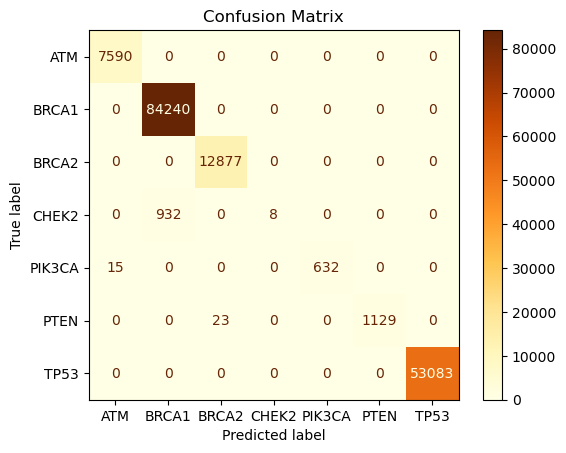

In [14]:
# Call the preprocess function
X, y, label_encoder = preprocess_data(df)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Identifying numerical and categorical features
numerical_features = ['chromosome', 'position']
categorical_features = [col for col in X.columns if col not in numerical_features]

# Normalizing the numerical data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

# Creating DataFrames of the scaled data
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features, index=X_test.index)

# Recombining scaled numerical columns with categorical columns
X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_features]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_features]], axis=1)

# Building and training the model
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_final, y_train)

# Saving the trained model joblib and pickel
dump(model, 'logistic_basic.joblib')

logistic_basic = 'logistic_basic.pkl'
with open(logistic_basic, 'wb') as file:
    pickle.dump(model, file)
    

# Making predictions and evaluations
predictions = model.predict(X_test_final)


# Generating and displaying the classification report
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(model.score(X_test_final, y_test)))
print(classification_report(y_test, predictions))

# Generating and displaying the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.YlOrBr)
plt.title("Confusion Matrix")
plt.show()

Upon removal of "Disease Class" column, the values indicates a better generalization to unseen data. 
However, the class 3 (CHEK2) despite having a perfect precision, its recall is extremely low at 0.01, resulting in a very low F1-score of 0.01. This suggests that while the predictions made as CHEK2 are correct, the model fails to identify nearly all actual CHEK2 cases, classifying them incorrectly as other mutations.


###### Due to the recall and F1-score being extremely low to class 3 (CHEK2) it was decided to balance the classes

### class_weight=balanced

Class ATM: 0
Class BRCA1: 1
Class BRCA2: 2
Class CHEK2: 3
Class PIK3CA: 4
Class PTEN: 5
Class TP53: 6
Accuracy of logistic regression classifier on test set: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7590
           1       0.99      1.00      0.99     84240
           2       1.00      1.00      1.00     12877
           3       1.00      0.08      0.15       940
           4       1.00      0.01      0.02       647
           5       0.64      1.00      0.78      1152
           6       1.00      1.00      1.00     53083

    accuracy                           0.99    160529
   macro avg       0.95      0.73      0.71    160529
weighted avg       0.99      0.99      0.99    160529



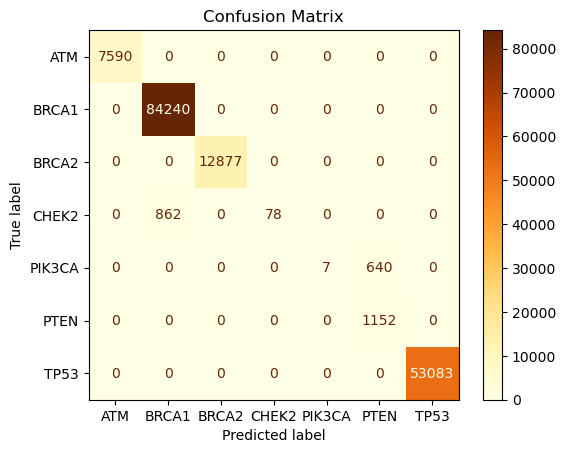

In [15]:
# Call the preprocess function
X, y, label_encoder = preprocess_data(df)


# Defyning X and y
X_res, y_res = X, y

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Identifying numerical and categorical features
numerical_features = ['chromosome', 'position']
categorical_features = [col for col in X.columns if col not in numerical_features]

# Normalizing the numerical data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

# Creating DataFrames of the scaled data
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features, index=X_test.index)

# Recombining scaled numerical columns with categorical columns
X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_features]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_features]], axis=1)


# Building and training the Random Forest model with constraints to avoid overfitting as per hyperparameter displayed on GridSearch
model = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, max_iter=1000, class_weight="balanced")
model.fit(X_train_final, y_train)

# Saving the trained model joblib and pickel
dump(model, 'logistic_class_weight_balanced.joblib')

logistic_class_weight_balanced = 'logistic_class_weight_balanced.pkl'
with open(logistic_class_weight_balanced, 'wb') as file:
    pickle.dump(model, file)
    

# Making predictions and evaluations
predictions = model.predict(X_test_final)
probabilities = model.predict_proba(X_test_final)

# Generating and displaying the classification report
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(model.score(X_test_final, y_test)))
print(classification_report(y_test, predictions))

# Generating and displaying the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualizing the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.YlOrBr)
plt.title("Confusion Matrix")
plt.show()

###### Due to the impact on class (PIK3CA) it was decided to upsample de class balance the classes, and maintain the balance

### Upsampling 7x with RandomOverSampler + class_weight=balanced

Class ATM: 0
Class BRCA1: 1
Class BRCA2: 2
Class CHEK2: 3
Class PIK3CA: 4
Class PTEN: 5
Class TP53: 6
Accuracy of logistic regression classifier on test set: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7590
           1       1.00      1.00      1.00     84241
           2       1.00      1.00      1.00     12877
           3       1.00      1.00      1.00      6577
           4       1.00      0.02      0.03       647
           5       0.64      1.00      0.78      1152
           6       1.00      1.00      1.00     53083

    accuracy                           1.00    166167
   macro avg       0.95      0.86      0.83    166167
weighted avg       1.00      1.00      0.99    166167



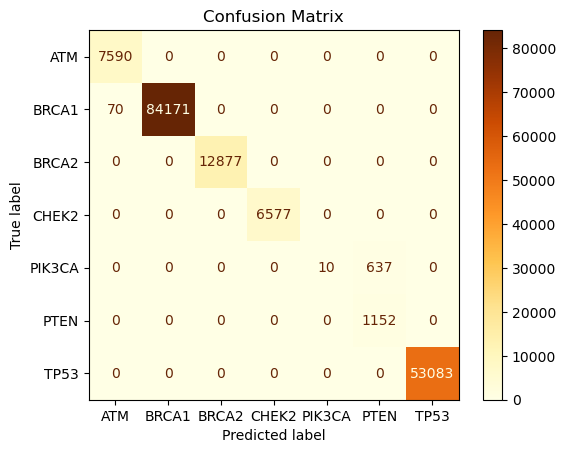

In [16]:
# Call the preprocess function
X, y, label_encoder = preprocess_data(df)


# Applying RandomOverSampler to balance class 3
ros = RandomOverSampler(sampling_strategy={3: y.value_counts()[3] * 7}, random_state=42)#7
X_res, y_res = ros.fit_resample(X, y)


# Splitting the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Identifying numerical and categorical features
numerical_features = ['chromosome', 'position']
categorical_features = [col for col in X.columns if col not in numerical_features]

# Normalizing the numerical datas
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

# Creating DataFrames of the scaled data
X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features, index=X_test.index)

# Recombining scaled numerical columns with categorical columns
X_train_final = pd.concat([X_train_scaled_df, X_train[categorical_features]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[categorical_features]], axis=1)


# Building and training the Random Forest model with constraints to avoid overfitting as per hyperparameter displayed on GridSearch
model = LogisticRegression(solver='liblinear', penalty='l1', C=1, max_iter=1000, class_weight="balanced")
model.fit(X_train_final, y_train)

# Saving the trained model joblib and pickel
dump(model, 'logistic_upsampling_class_weight_balanced.joblib')

logistic_upsampling_class_weight_balanced = 'logistic_upsampling_class_weight_balanced.pkl'
with open(logistic_upsampling_class_weight_balanced, 'wb') as file:
    pickle.dump(model, file)

# Making predictions and evaluations
predictions = model.predict(X_test_final)
probabilities = model.predict_proba(X_test_final)

# Gerando e exibindo o relatório de classificação
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(model.score(X_test_final, y_test)))
print(classification_report(y_test, predictions))

# Generating and displaying the classification report
cm = confusion_matrix(y_test, predictions)

# Generating and displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.YlOrBr)
plt.title("Confusion Matrix")
plt.show()

In [17]:
@def predict_cancer():
    # Carregando o modelo, scaler e label encoder
    model = load('logistic_regression_model.joblib')
    scaler = load('scaler.joblib')
    label_encoder = load('label_encoder.joblib')
    
    # Solicitando entradas do usuário
    print("Please enter the values for the features:")
    user_input = {
        'class': input("class: "),
        'chromosome': input("chromosome: "),
        'position': input("position: "),
        'most_severe_consequence': input("most_severe_consequence: "),
        'Category': input("Category: ")
    }
    
    # Convertendo as entradas do usuário em DataFrame
    input_df = pd.DataFrame([user_input])

    # Aplicando One-Hot Encoding
    input_df_encoded = pd.get_dummies(input_df, columns=['class', 'most_severe_consequence', 'Category'], drop_first=True)
    
    # Garantindo que todas as características de treinamento estejam presentes
    missing_cols = set(X_train.columns) - set(input_df_encoded.columns)
    for col in missing_cols:
        input_df_encoded[col] = 0
    input_df_encoded = input_df_encoded.reindex(columns=X_train.columns, fill_value=0)
    
    # Scaling numerical features
    input_df_encoded[numerical_features] = scaler.transform(input_df_encoded[numerical_features])
    
    # Making predictions
    prediction = model.predict(input_df_encoded)
    predicted_class = label_encoder.inverse_transform(prediction)
    
    # Getting the probabilities of the prediction
    probabilities = model.predict_proba(input_df_encoded)
    predicted_class_probability = np.max(probabilities)
    predicted_class_label = prediction[0]
    
    #print(f"The predicted Gene/Protein Symbol is: {predicted_class[0]}")
    print(f"The predicted Gene/Protein Symbol is {predicted_class[0]} with {predicted_class_probability * 100:.2f}% confidence.")



SyntaxError: invalid syntax (2422577355.py, line 1)

In [ ]:
#Calling the function
predict_cancer()